<a href="https://colab.research.google.com/github/jessy235/Simulacion-II/blob/main/Comparaci%C3%B3n_de_MC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Monte carlo metodo

librerias

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
import random as rd
import time

parametros

In [ ]:
n = 100
N = 100

definimos la funcion

In [ ]:
def g(x):
    return np.sqrt(np.arctan(x))

 Método Monte Carlo Crudo

In [ ]:

def mc_crudo(n):
    U = np.random.rand(n)
    G = g(U)
    return np.mean(G)

Método Monte Carlo Acierto y Error

In [ ]:
def mc_acierto_error(n):
    aciertos = 0
    for i in range(n):
        x = rd.random()
        y = rd.random()
        if y <= g(x):
            aciertos += 1
    return aciertos / n

Simulacion

In [ ]:
def simulacion(N, n, metodo):
    estimaciones = []
    for _ in range(N):
        estimaciones.append(metodo(n))
    estimaciones = np.array(estimaciones)
    return np.mean(estimaciones), np.var(estimaciones), np.std(estimaciones), estimaciones

monte carlo crudo

In [ ]:
start = time.time()
media_crudo, var_crudo, std_crudo, est_crudo = simulacion(N, n, mc_crudo)
t1 = time.time() - start

acierto y error

In [ ]:
start = time.time()
media_ae, var_ae, std_ae, est_ae = simulacion(N, n, mc_acierto_error)
t2 = time.time() - start

RESULTADOS

In [ ]:
print("===== MONTE CARLO CRUDO =====")
print("Estimación promedio:", media_crudo)
print("Varianza de las estimaciones:", var_crudo)
print("Desviación estándar:", std_crudo)
print("Tiempo total:", t1, "seg")

===== MONTE CARLO CRUDO =====
Estimación promedio: 0.6290159255326635
Varianza de las estimaciones: 0.00046588037321125666
Desviación estándar: 0.02158426216508817
Tiempo total: 0.022490501403808594 seg


In [ ]:
print("\n===== MONTE CARLO ACIERTO Y ERROR =====")
print("Estimación promedio:", media_ae)
print("Varianza de las estimaciones:", var_ae)
print("Desviación estándar:", std_ae)
print("Tiempo total:", t2, "seg")


===== MONTE CARLO ACIERTO Y ERROR =====
Estimación promedio: 0.6276999999999999
Varianza de las estimaciones: 0.0023317100000000003
Desviación estándar: 0.0482877831340392
Tiempo total: 0.04940152168273926 seg


EFICIENCIA (epsilon)

In [ ]:
E = (t2 * var_ae) / (t1 * var_crudo)
print("\n===== EFICIENCIA =====")
print("ε = (t2 * Var(AE)) / (t1 * Var(Crudo)) =", E)
if E < 1:
    print("→ El método Acierto–Error es más eficiente.")
else:
    print("→ El método Crudo es más eficiente.")


===== EFICIENCIA =====
ε = (t2 * Var(AE)) / (t1 * Var(Crudo)) = 10.99363488399267
→ El método Crudo es más eficiente.


graficas

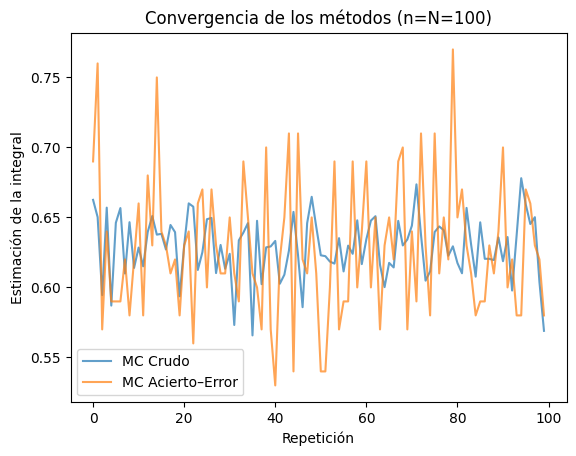

In [ ]:
plt.plot(est_crudo, label="MC Crudo", alpha=0.7)
plt.plot(est_ae, label="MC Acierto–Error", alpha=0.7)
plt.title("Convergencia de los métodos (n=N=100)")
plt.xlabel("Repetición")
plt.ylabel("Estimación de la integral")
plt.legend()
plt.show()